Loading data and libraries


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

data = pd.read_csv('./train.csv')



We can count how many are background signals and other . Now lets also split the data into our features and labels.

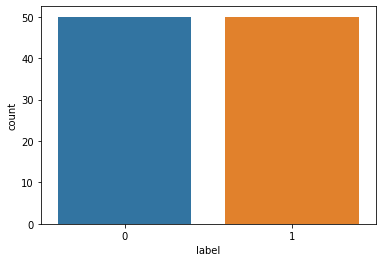

In [3]:

sns.countplot(x = 'label', data = data)
#Split data to get hold out test set
df = pd.read_csv("./train.csv")
dft=pd.read_csv("./test.csv")
x_train= df.iloc[:, 1:]
x_test= dft.iloc[:, 1:]

y_train = df.label
y_test = dft.label

We can check to see if there are any correlations between these features

Index(['f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


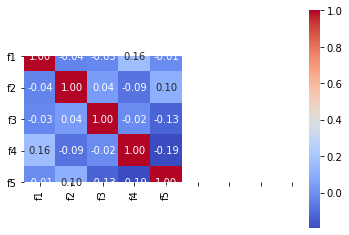

In [4]:
print(x_train.columns)
features_mean = x_train.columns[0:6]


#Correlation between sets of features
corr = x_train[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 10}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 10)
g.set_yticklabels(rotation=0, labels = features_mean, size = 10)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (10,10)





Lets go ahead and move on to preprocessing our data in order to apply our ML classifiers. In addition, we need to take in account data for a training and test set

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(y_train)


0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: label, Length: 100, dtype: int64


In [6]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    #plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    #plt.xlabel('Component 1')
    #plt.ylabel('Component 2')
    #plt.legend()
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

    







In [7]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.subplot(2,1,1)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.tight_layout()

In addition to the boundary lines, it will output the confusion matrix, classification report, and graph of the decision boundary on both the training and test set.
There will be multiple classifiers used under different PCA conditions.

In [8]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

[[41  9]
 [25 25]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71        50
           1       0.74      0.50      0.60        50

    accuracy                           0.66       100
   macro avg       0.68      0.66      0.65       100
weighted avg       0.68      0.66      0.65       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

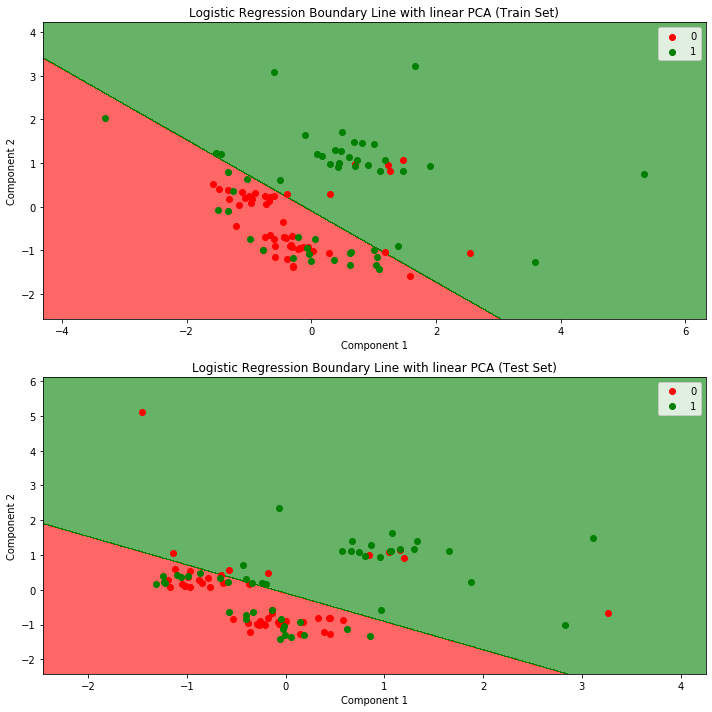

In [9]:
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[40 10]
 [19 31]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.76      0.62      0.68        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



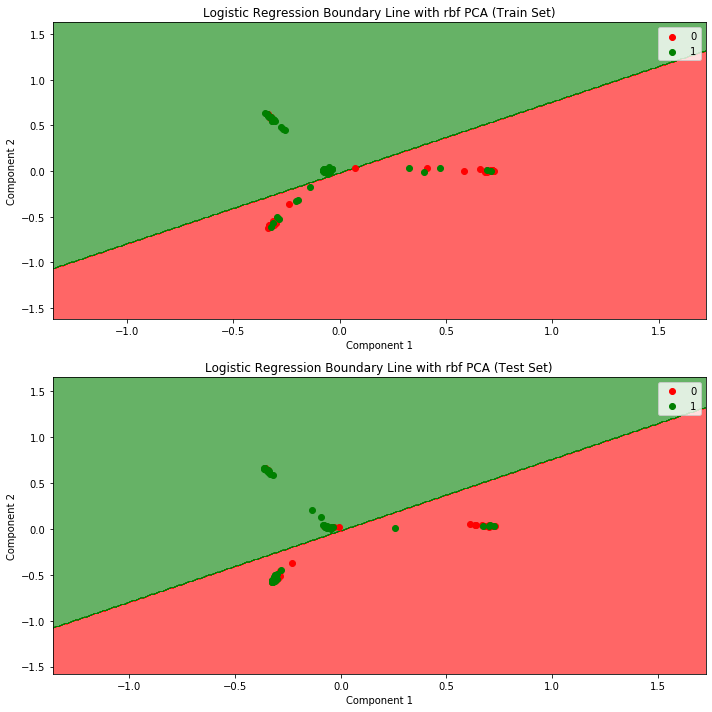

In [10]:
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

[[43  7]
 [33 17]]
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        50
           1       0.71      0.34      0.46        50

    accuracy                           0.60       100
   macro avg       0.64      0.60      0.57       100
weighted avg       0.64      0.60      0.57       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

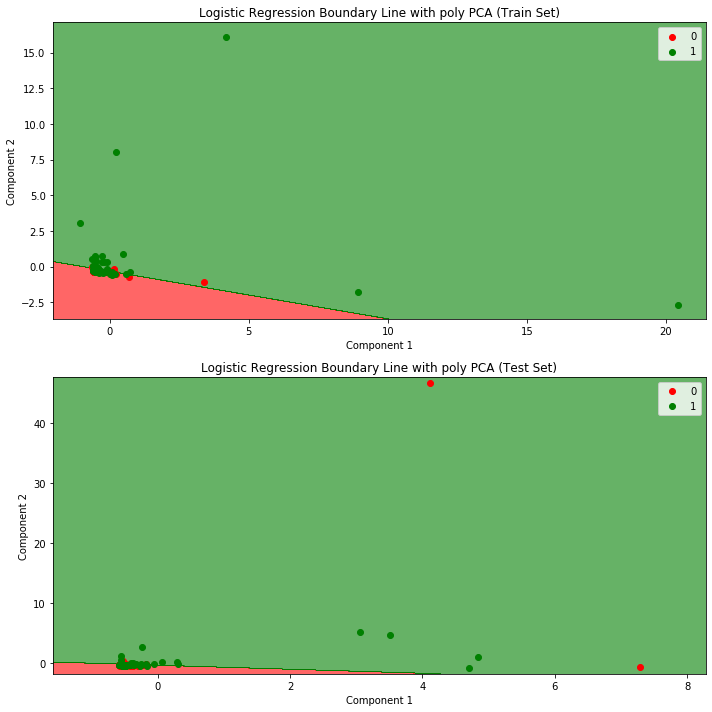

In [11]:
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[36 14]
 [21 29]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        50
           1       0.67      0.58      0.62        50

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


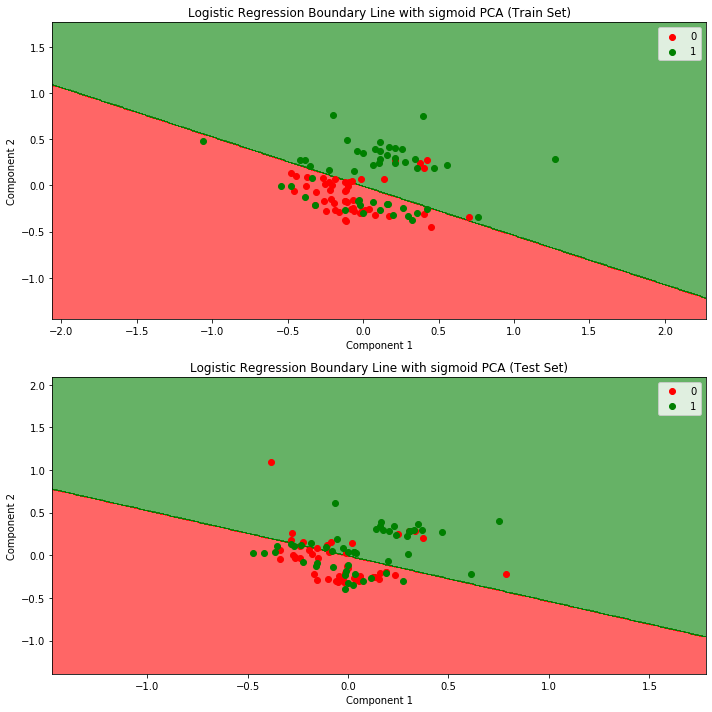

In [12]:
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[41  9]
 [19 31]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.75        50
           1       0.78      0.62      0.69        50

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


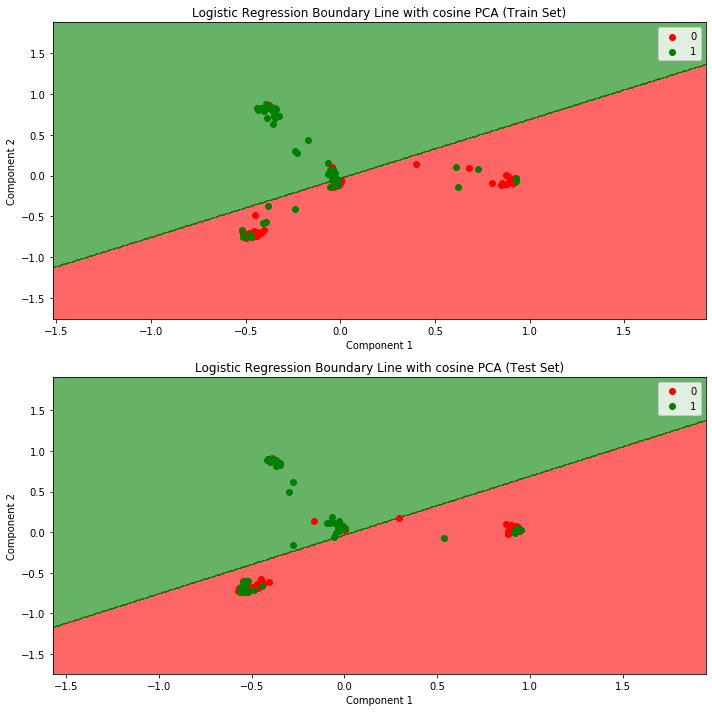

In [13]:
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")

In [14]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

[[43  7]
 [32 18]]
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        50
           1       0.72      0.36      0.48        50

    accuracy                           0.61       100
   macro avg       0.65      0.61      0.58       100
weighted avg       0.65      0.61      0.58       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

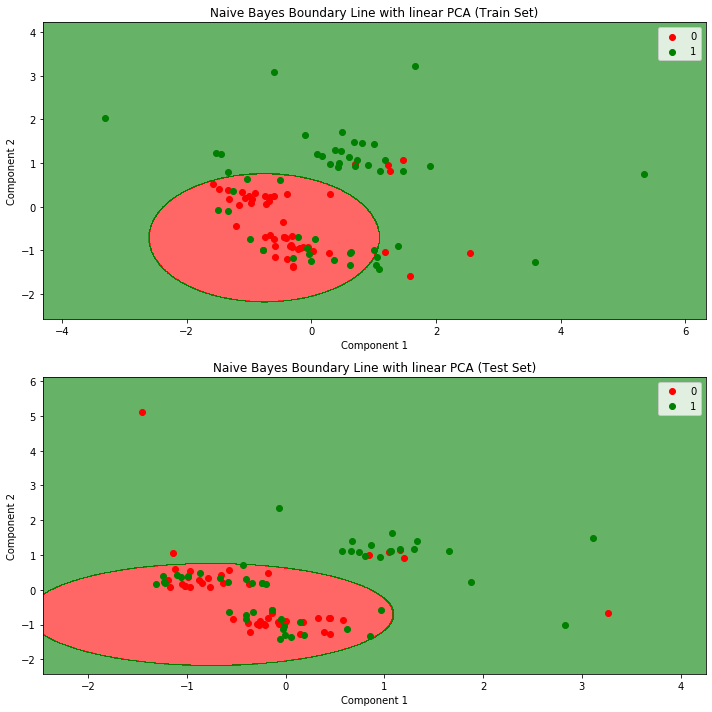

In [15]:
BoundaryLine('linear', GaussianNB(), "Naive Bayes")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[40 10]
 [19 31]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.76      0.62      0.68        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


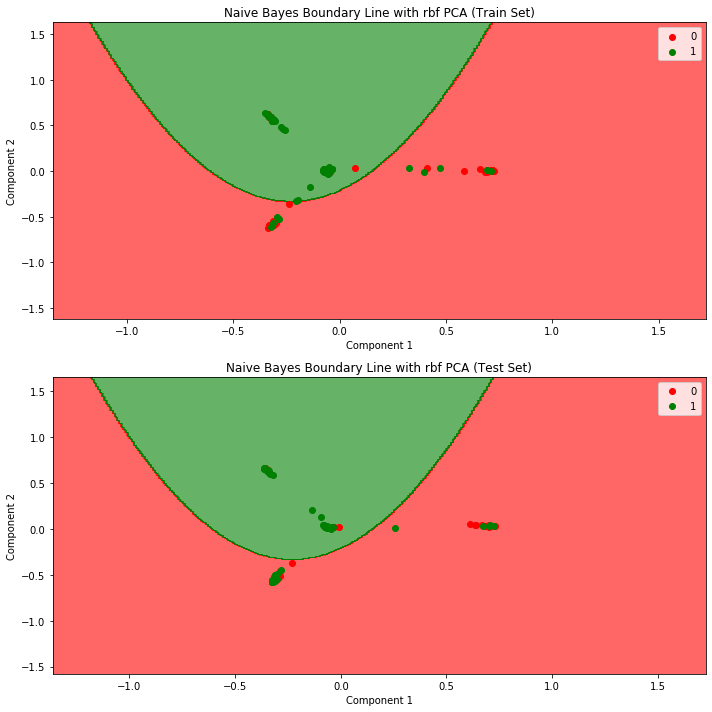

In [16]:
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")

[[47  3]
 [41  9]]
              precision    recall  f1-score   support

           0       0.53      0.94      0.68        50
           1       0.75      0.18      0.29        50

    accuracy                           0.56       100
   macro avg       0.64      0.56      0.49       100
weighted avg       0.64      0.56      0.49       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

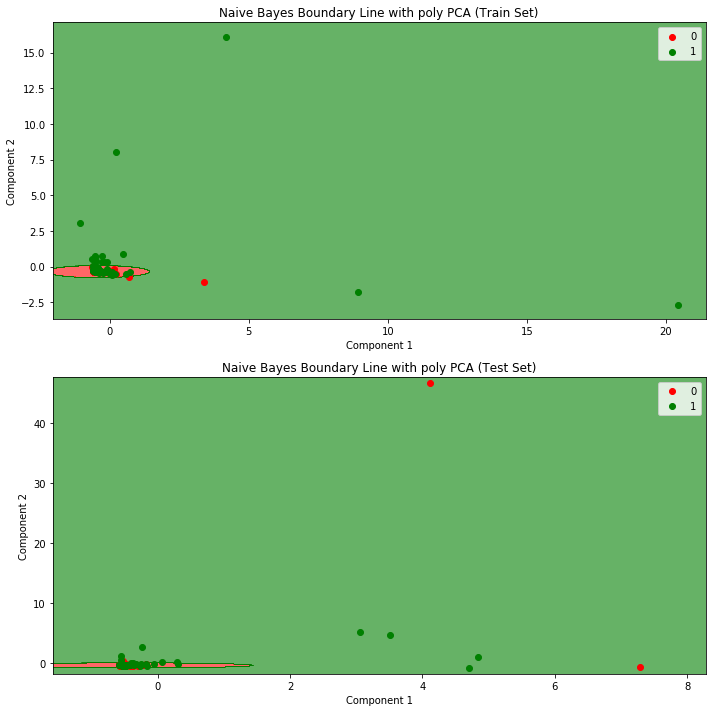

In [17]:
BoundaryLine('poly', GaussianNB(), "Naive Bayes")

[[39 11]
 [31 19]]
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        50
           1       0.63      0.38      0.48        50

    accuracy                           0.58       100
   macro avg       0.60      0.58      0.56       100
weighted avg       0.60      0.58      0.56       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

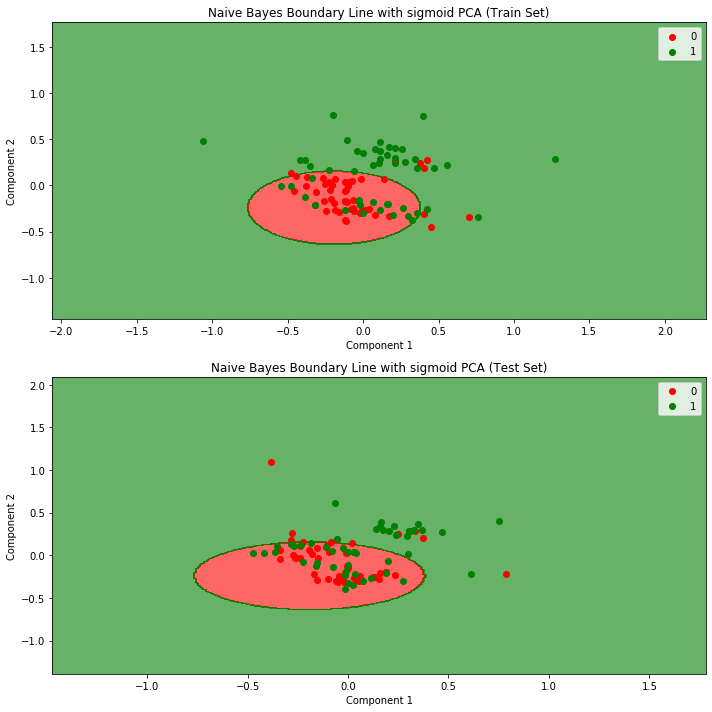

In [18]:
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[40 10]
 [19 31]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.76      0.62      0.68        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


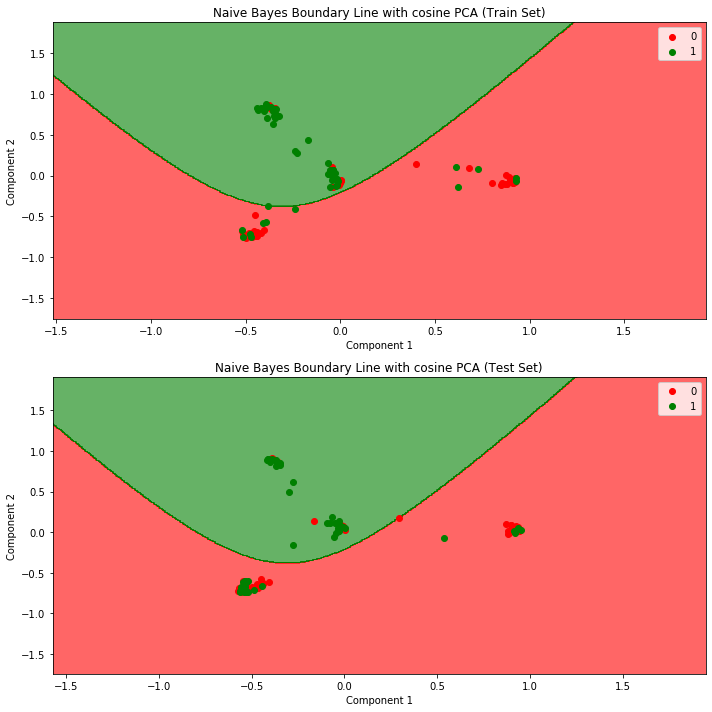

In [19]:
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

In [20]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

[[37 13]
 [29 21]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64        50
           1       0.62      0.42      0.50        50

    accuracy                           0.58       100
   macro avg       0.59      0.58      0.57       100
weighted avg       0.59      0.58      0.57       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

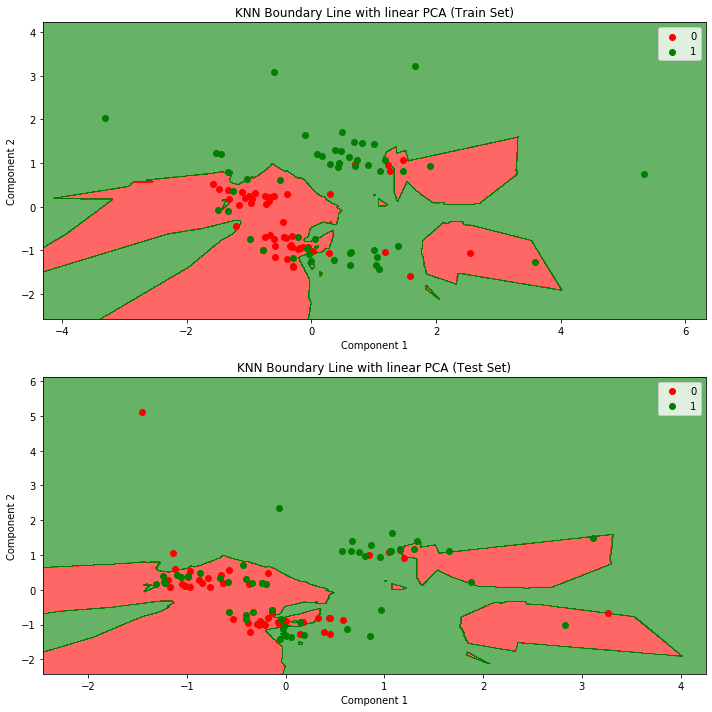

In [22]:
BoundaryLine('linear', KNeighborsClassifier(), "KNN")

[[37 13]
 [15 35]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        50
           1       0.73      0.70      0.71        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

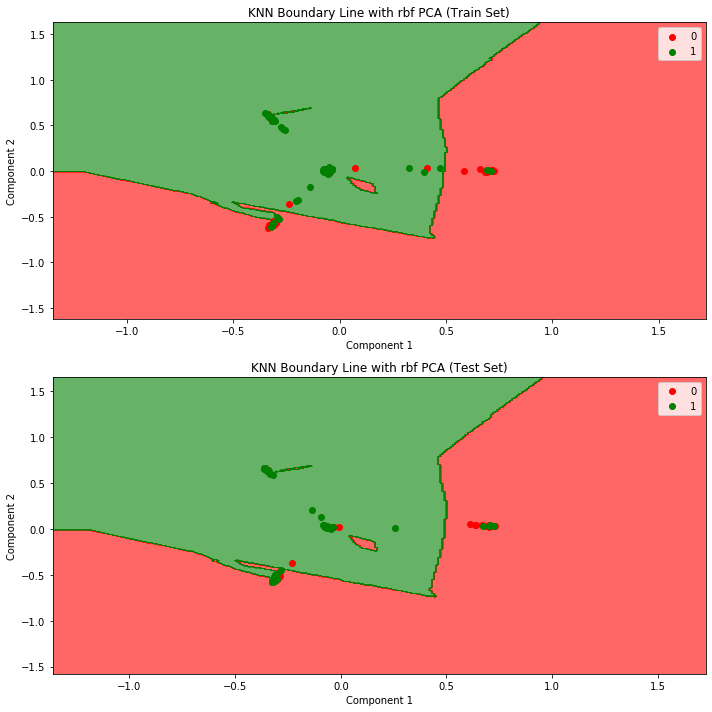

In [23]:
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")

[[31 19]
 [20 30]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.61        50
           1       0.61      0.60      0.61        50

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

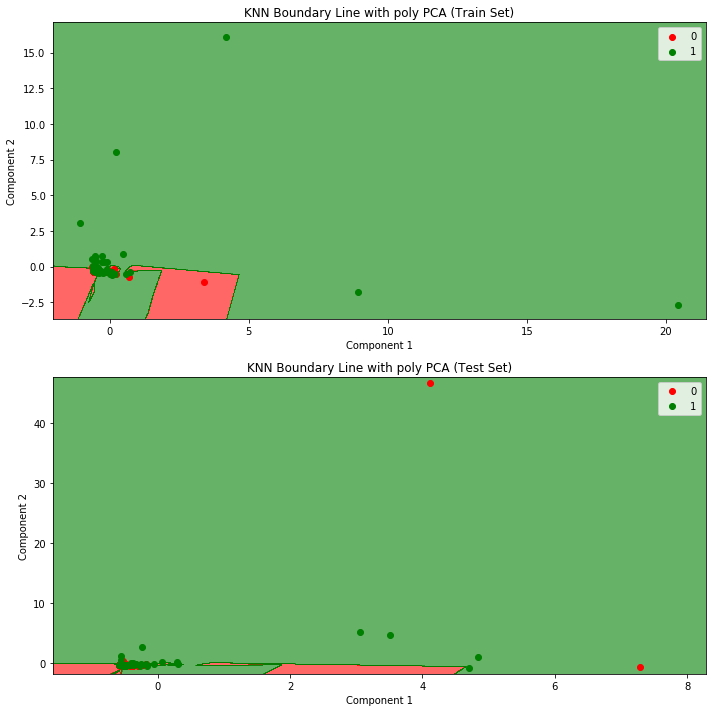

In [24]:
BoundaryLine('poly', KNeighborsClassifier(), "KNN")

[[33 17]
 [28 22]]
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        50
           1       0.56      0.44      0.49        50

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.55      0.55      0.54       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

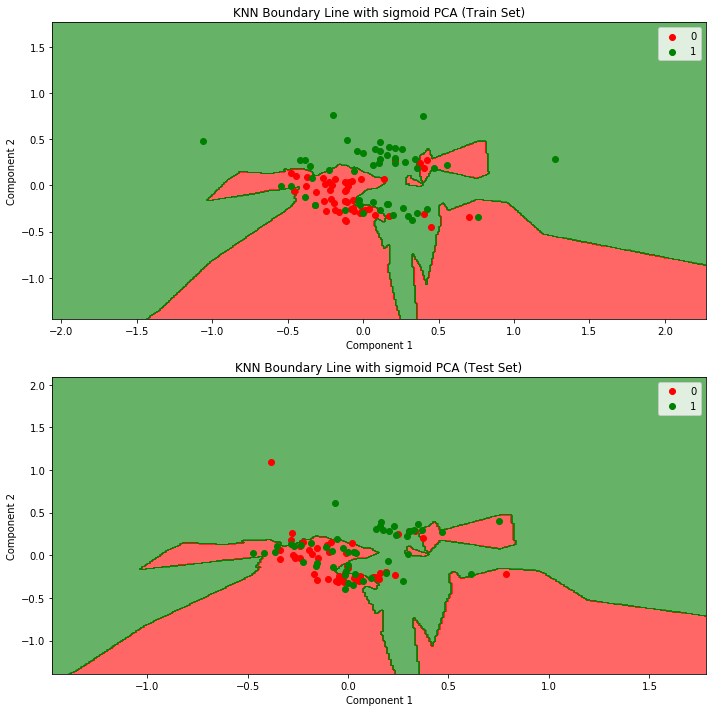

In [25]:
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")

[[42  8]
 [21 29]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.74        50
           1       0.78      0.58      0.67        50

    accuracy                           0.71       100
   macro avg       0.73      0.71      0.71       100
weighted avg       0.73      0.71      0.71       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

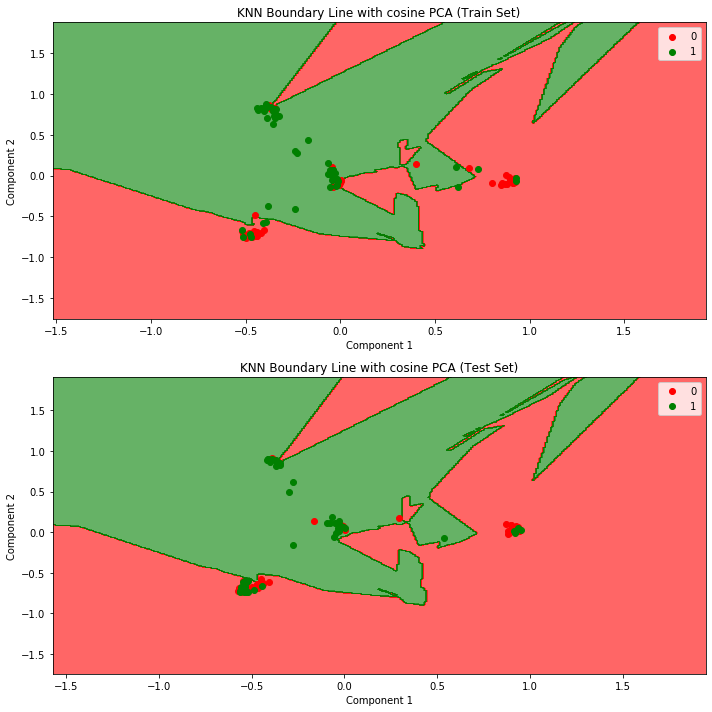

In [26]:
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

[[33 17]
 [24 26]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        50
           1       0.60      0.52      0.56        50

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

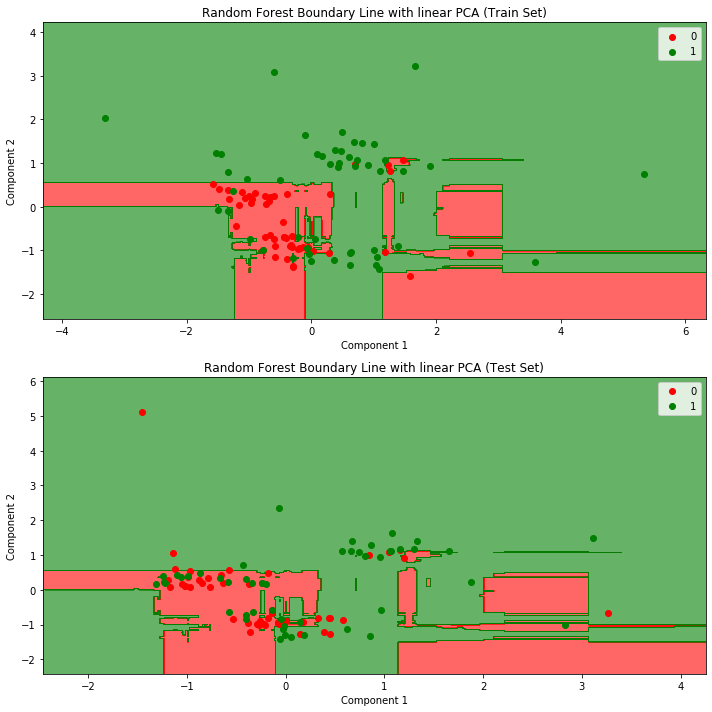

In [28]:
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")

[[33 17]
 [16 34]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        50
           1       0.67      0.68      0.67        50

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

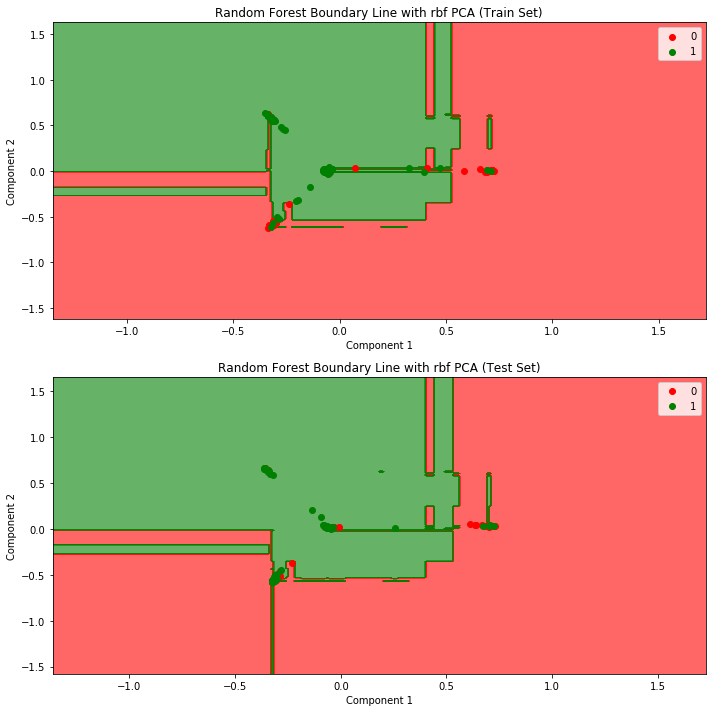

In [29]:
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")

[[29 21]
 [16 34]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        50
           1       0.62      0.68      0.65        50

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

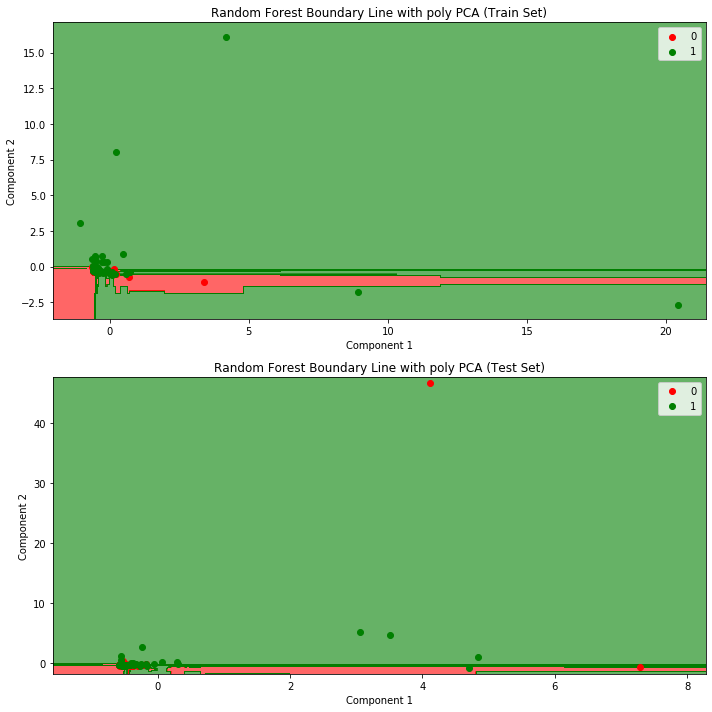

In [30]:
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")

[[26 24]
 [23 27]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.53        50
           1       0.53      0.54      0.53        50

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

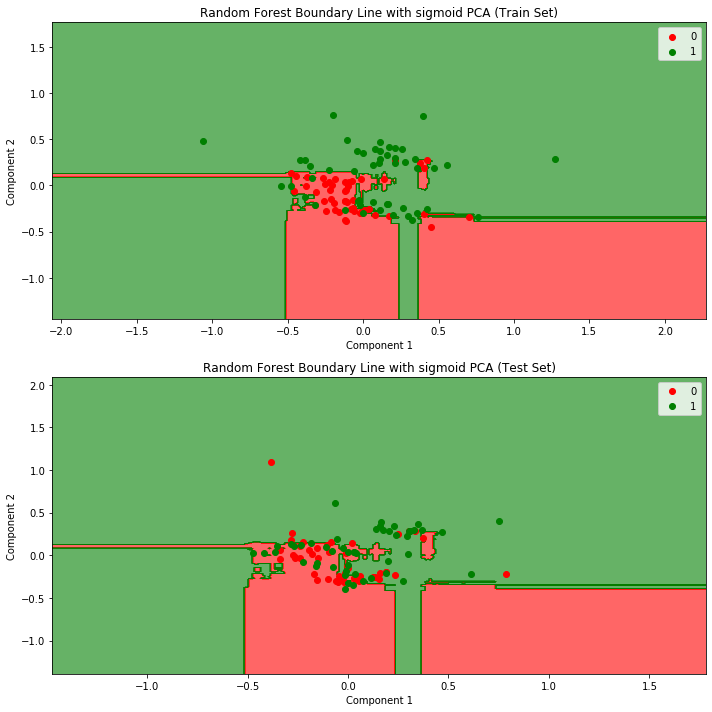

In [31]:
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")

[[29 21]
 [13 37]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        50
           1       0.64      0.74      0.69        50

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

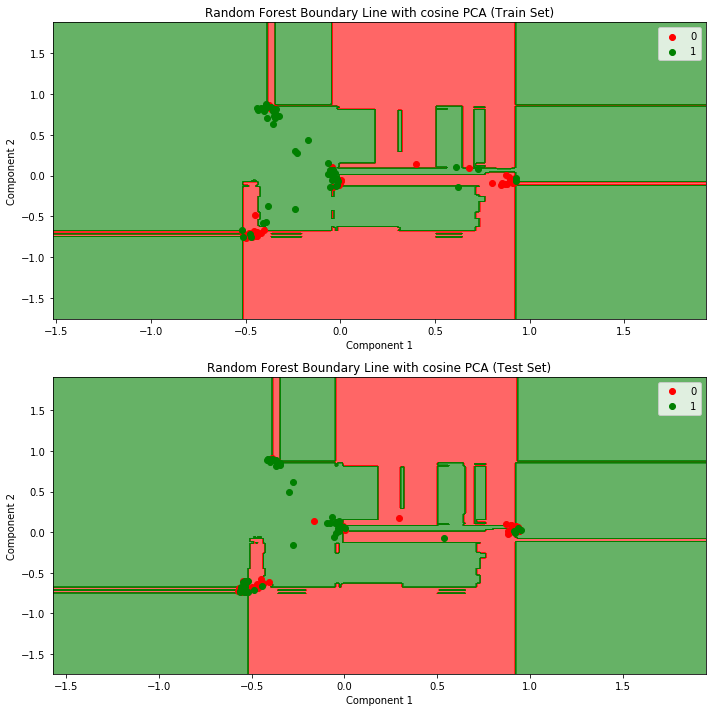

In [32]:
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

In [33]:
#Support Vector - linear
from sklearn.svm import SVC

[[43  7]
 [31 19]]
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        50
           1       0.73      0.38      0.50        50

    accuracy                           0.62       100
   macro avg       0.66      0.62      0.60       100
weighted avg       0.66      0.62      0.60       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

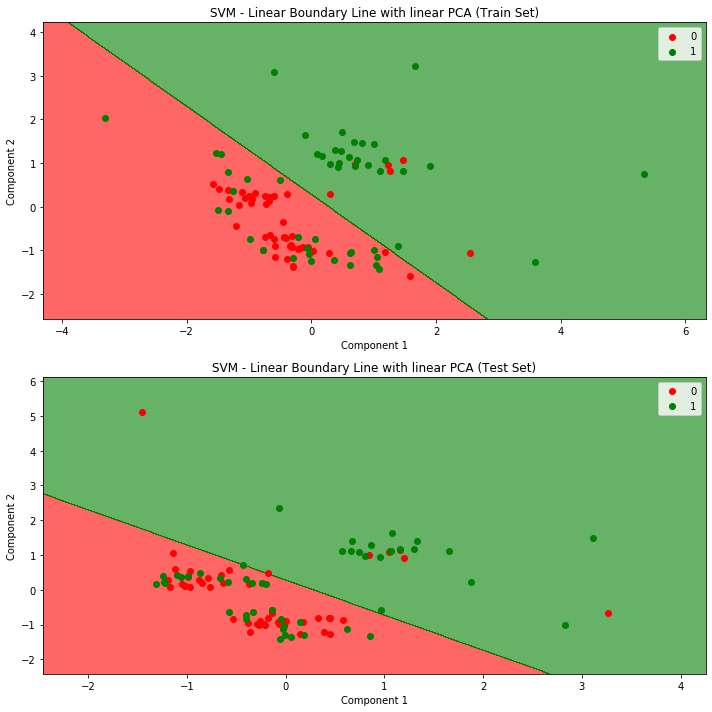

In [34]:
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")

[[46  4]
 [35 15]]
              precision    recall  f1-score   support

           0       0.57      0.92      0.70        50
           1       0.79      0.30      0.43        50

    accuracy                           0.61       100
   macro avg       0.68      0.61      0.57       100
weighted avg       0.68      0.61      0.57       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

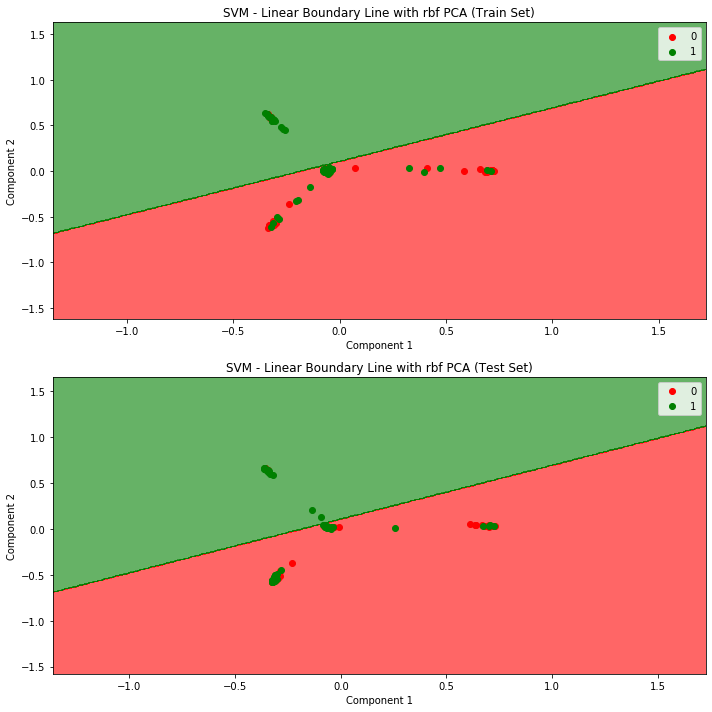

In [35]:
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")

[[47  3]
 [36 14]]
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        50
           1       0.82      0.28      0.42        50

    accuracy                           0.61       100
   macro avg       0.69      0.61      0.56       100
weighted avg       0.69      0.61      0.56       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

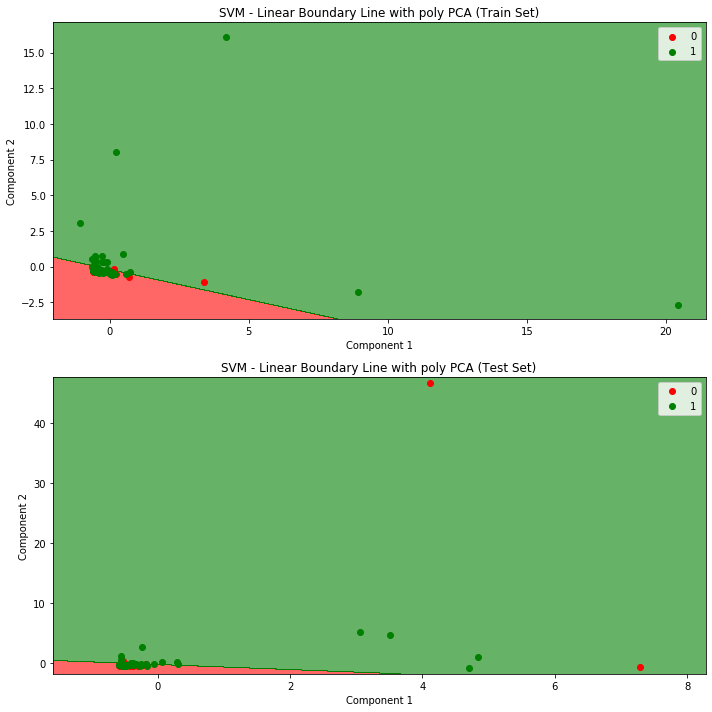

In [36]:
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")

[[41  9]
 [31 19]]
              precision    recall  f1-score   support

           0       0.57      0.82      0.67        50
           1       0.68      0.38      0.49        50

    accuracy                           0.60       100
   macro avg       0.62      0.60      0.58       100
weighted avg       0.62      0.60      0.58       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

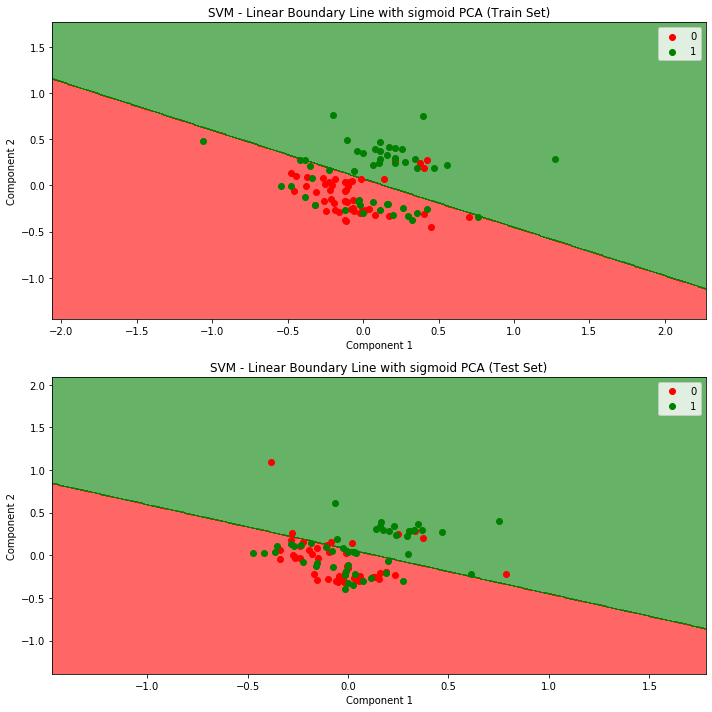

In [37]:
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")

[[45  5]
 [31 19]]
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        50
           1       0.79      0.38      0.51        50

    accuracy                           0.64       100
   macro avg       0.69      0.64      0.61       100
weighted avg       0.69      0.64      0.61       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

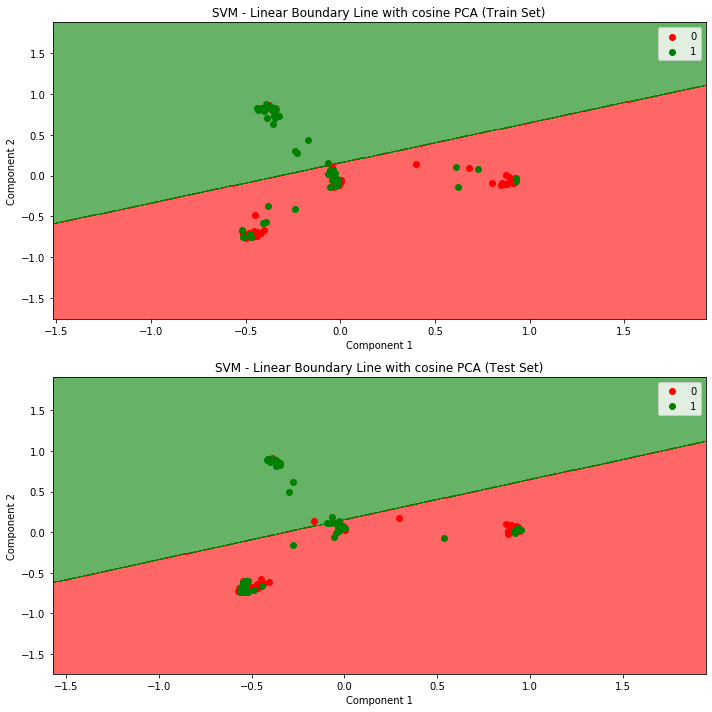

In [38]:
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

[[37 13]
 [27 23]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        50
           1       0.64      0.46      0.53        50

    accuracy                           0.60       100
   macro avg       0.61      0.60      0.59       100
weighted avg       0.61      0.60      0.59       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

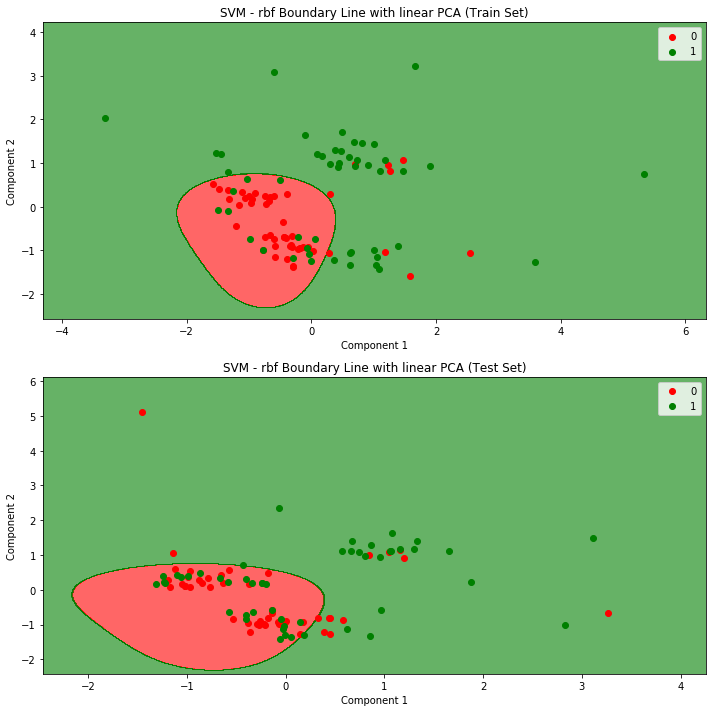

In [39]:
#Support Vector - RBF
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")

[[40 10]
 [18 32]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        50
           1       0.76      0.64      0.70        50

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

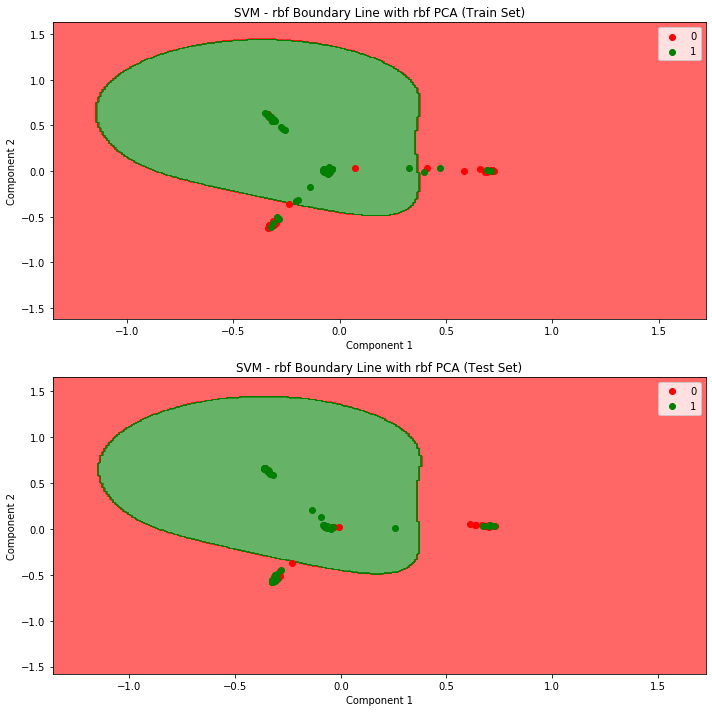

In [40]:
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")

[[47  3]
 [40 10]]
              precision    recall  f1-score   support

           0       0.54      0.94      0.69        50
           1       0.77      0.20      0.32        50

    accuracy                           0.57       100
   macro avg       0.65      0.57      0.50       100
weighted avg       0.65      0.57      0.50       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

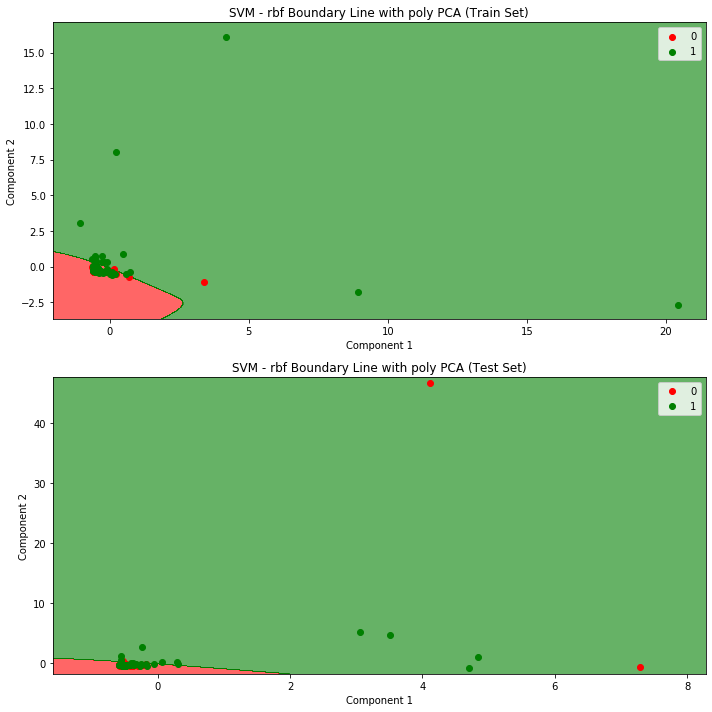

In [41]:
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")

[[34 16]
 [27 23]]
              precision    recall  f1-score   support

           0       0.56      0.68      0.61        50
           1       0.59      0.46      0.52        50

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.56       100
weighted avg       0.57      0.57      0.56       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

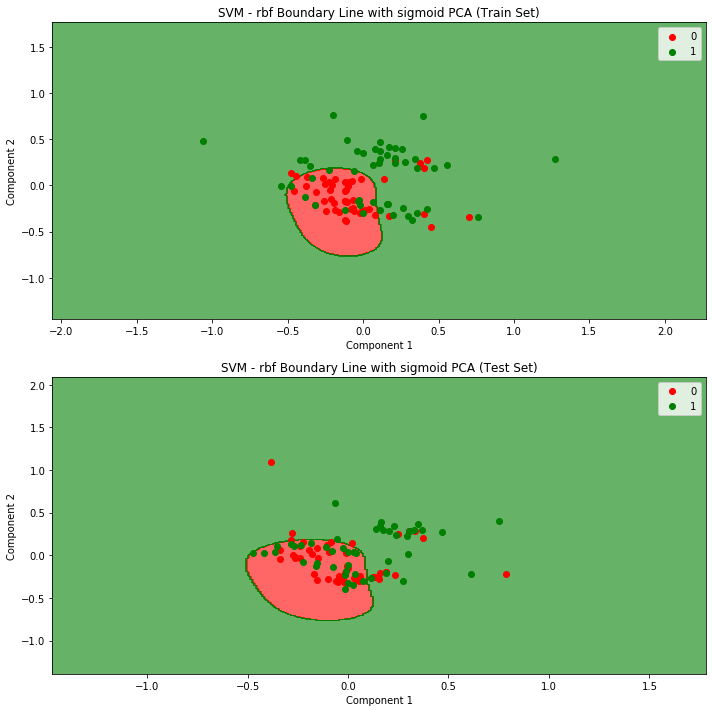

In [42]:
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")

[[40 10]
 [19 31]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.76      0.62      0.68        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

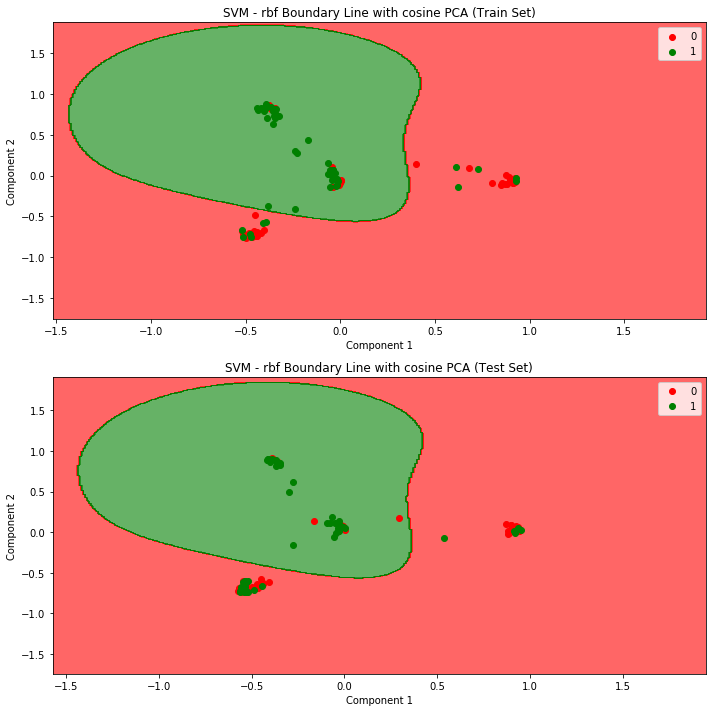

In [43]:
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")

[[44  6]
 [32 18]]
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        50
           1       0.75      0.36      0.49        50

    accuracy                           0.62       100
   macro avg       0.66      0.62      0.59       100
weighted avg       0.66      0.62      0.59       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

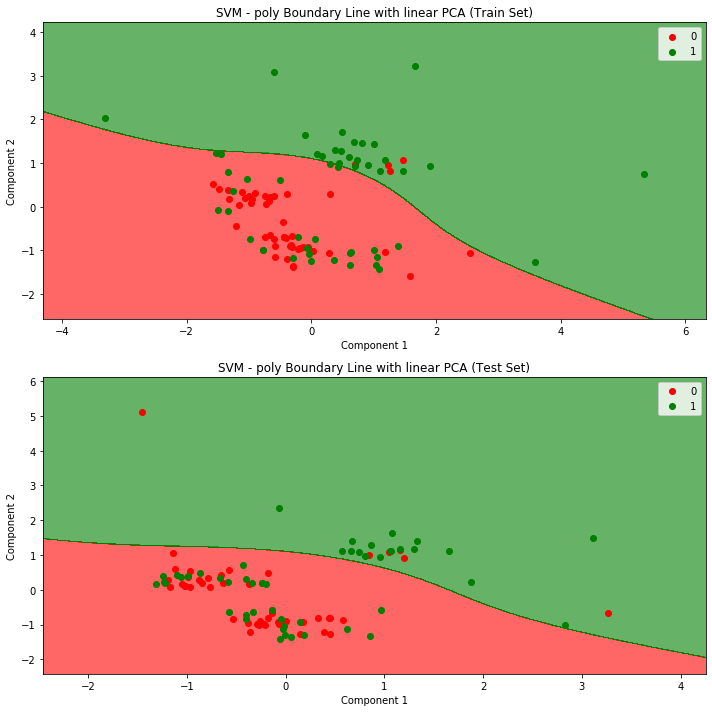

In [44]:
#Support Vector - Poly
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")

[[39 11]
 [18 32]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        50
           1       0.74      0.64      0.69        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

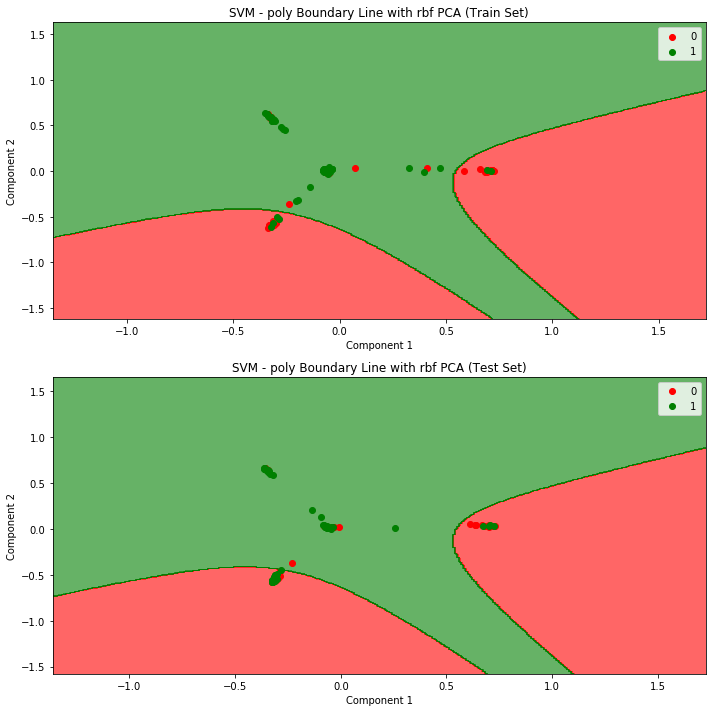

In [45]:
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")

[[48  2]
 [47  3]]
              precision    recall  f1-score   support

           0       0.51      0.96      0.66        50
           1       0.60      0.06      0.11        50

    accuracy                           0.51       100
   macro avg       0.55      0.51      0.39       100
weighted avg       0.55      0.51      0.39       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

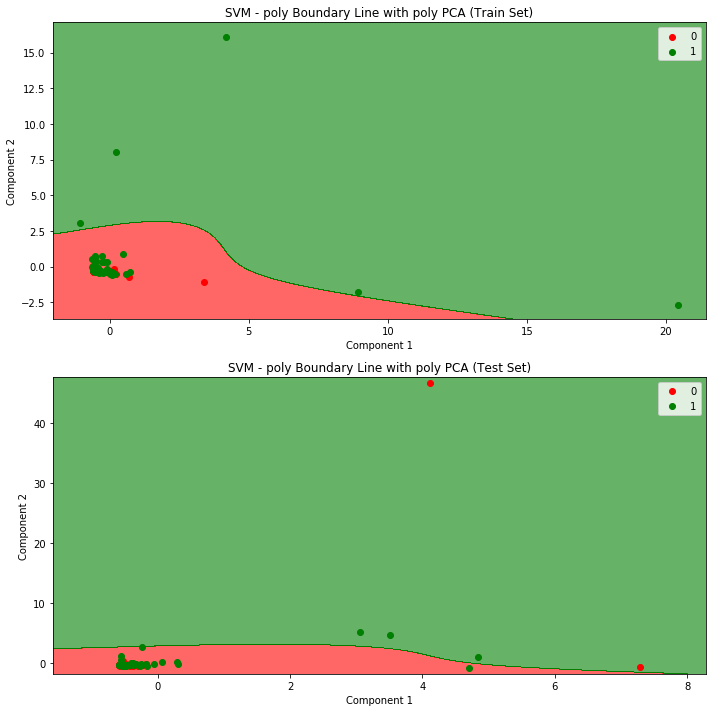

In [46]:
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")

[[45  5]
 [34 16]]
              precision    recall  f1-score   support

           0       0.57      0.90      0.70        50
           1       0.76      0.32      0.45        50

    accuracy                           0.61       100
   macro avg       0.67      0.61      0.57       100
weighted avg       0.67      0.61      0.57       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

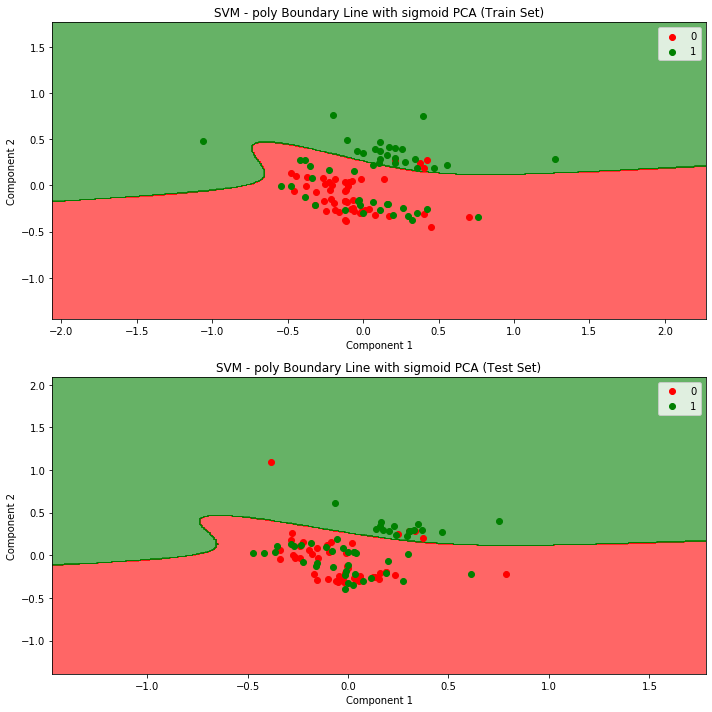

In [47]:
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")

[[40 10]
 [18 32]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        50
           1       0.76      0.64      0.70        50

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

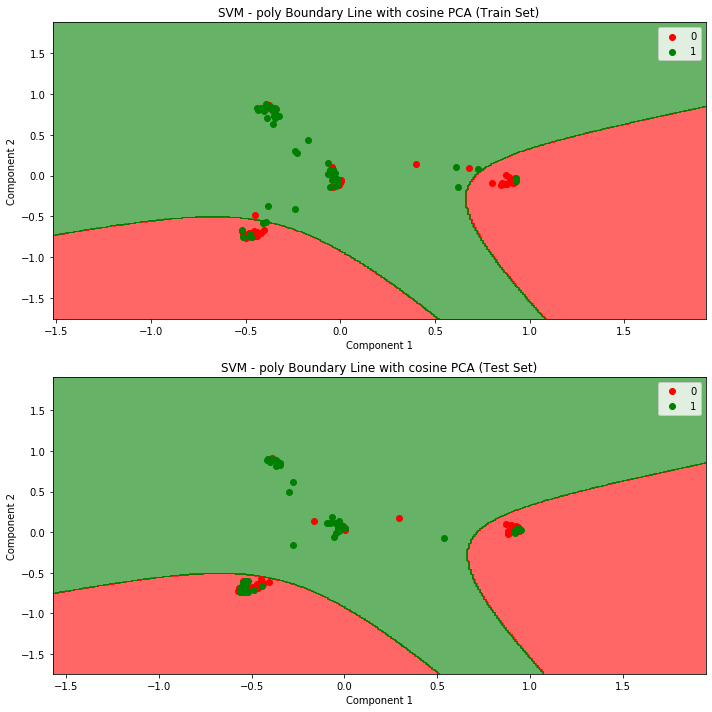

In [48]:
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")